In [70]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [71]:
# CIFAR-10 클래스 이름 정의
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [72]:
# CutOut 변환 정의 (이미지의 일부를 랜덤하게 가리는 데이터 증강 기법)
def cutout(img, num_holes=1, size=16):
    h, w = img.shape[1:]  # 이미지의 높이와 너비 가져오기
    mask = torch.ones_like(img)  # 원본 이미지와 동일한 크기의 마스크 생성 (1로 초기화)
    for _ in range(num_holes):
        y = random.randint(0, h - size)  # 무작위로 가릴 부분의 y 좌표 선택
        x = random.randint(0, w - size)  # 무작위로 가릴 부분의 x 좌표 선택
        mask[:, y:y+size, x:x+size] = 0  # 해당 영역을 0으로 설정하여 가리기
    return img * mask  # 원본 이미지에 마스크 적용

# CutOut을 위한 변환 클래스 정의
class CutOut:
    def __init__(self, num_holes=1, size=16):
        self.num_holes = num_holes  # 가릴 영역의 개수
        self.size = size  # 가릴 영역의 크기

    def __call__(self, img):
        return cutout(img, self.num_holes, self.size)  # CutOut 적용

In [73]:
# 데이터 변환 정의 (ToTensor 변환 후 CutOut 적용)
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환 (0~1 범위로 정규화됨)
    CutOut(num_holes=1, size=16)  # CutOut 적용
])

In [74]:
# CIFAR-10 데이터셋 로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)  # 배치 크기 10으로 설정

In [75]:
# 샘플 10개 출력 함수 정의 (개별 이미지 간격 추가 및 클래스 이름 각각 표시)
def imshow(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2행 5열의 서브플롯 생성
    images = images.numpy()

    for i, ax in enumerate(axes.flat):
        img = np.transpose(images[i], (1, 2, 0))  # PyTorch: CxHxW -> Matplotlib: HxWxC
        ax.imshow(img)
        ax.set_title(classes[labels[i]])  # 개별 이미지 아래 클래스 이름 출력
        ax.axis('off')

    plt.tight_layout()
    plt.show()

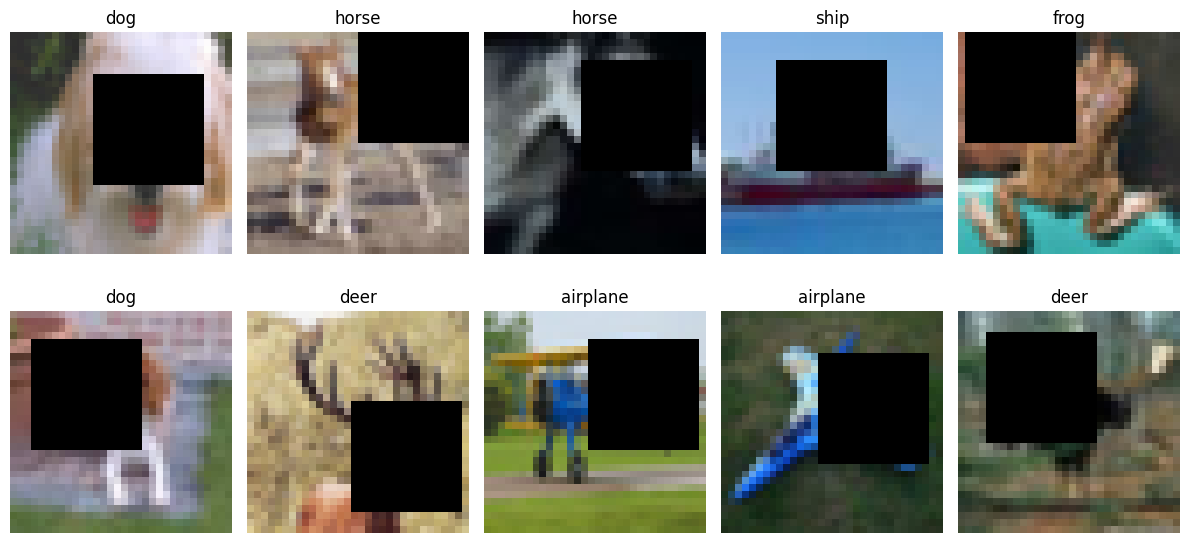

이미지 라벨 출력: torch.Size([10, 3, 32, 32])


In [76]:
# 배치에서 10개 이미지 가져오기 및 출력
dataiter = iter(trainloader)  # 데이터 로더에서 반복자 생성
images, labels = next(dataiter)  # 첫 번째 배치 가져오기
imshow(images, labels)  # 이미지 출력 및 클래스 이름 표시
print(f"이미지 라벨 출력: {images.shape}")